In [1]:
import utils as ut
import receiverClass as rc
import senderClass as sc
import time
import matplotlib.pyplot as plt

In [23]:
bob = rc.receiver()
alice = sc.sender()

n_list = []
time_list = []
p_prev = 0
q_prev = 0

for i in range(40, 100):
    p, q = ut.generate_primes(i)
    while(p*q < p_prev*q_prev):
        p, q = ut.generate_primes(i)
    bob.p, bob.q = p, q
    p_prev, q_prev = p, q

    # set value of e and n for both sender and receiver 
    bob.e = ut.generate_e(bob.p,bob.q)
    bob.n = bob.p * bob.q

    alice.e = bob.e
    alice.n = bob.n

    n_list.append(bob.n)
    M = "Nada"
    start = time.time_ns()
    cipher_text= alice.encrypt(M)  
    time_list.append(time.time_ns() - start)

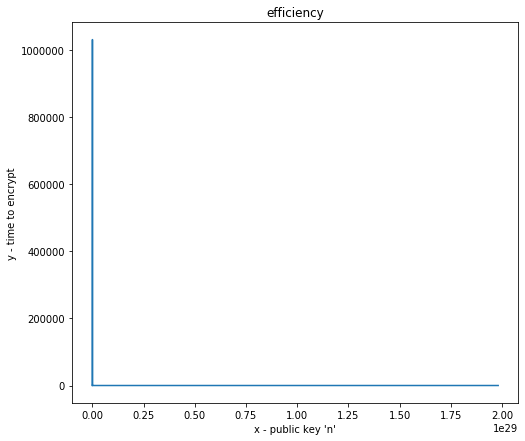

In [24]:
#ploting
plt.figure(figsize=(8,7))
plt.plot(n_list, time_list)

plt.xlabel('x - public key \'n\'')
plt.ylabel('y - time to encrypt')
plt.title('efficiency')

plt.show()